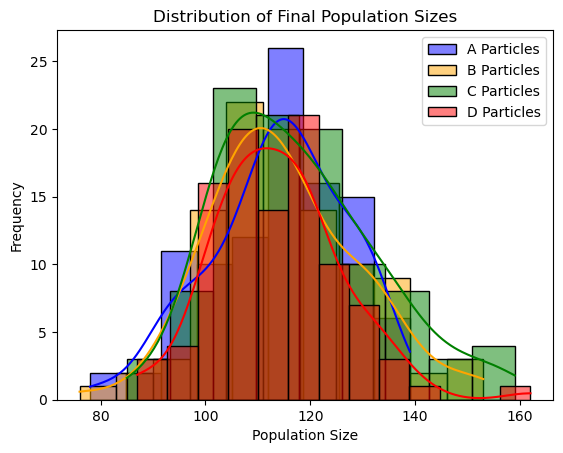

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
num_A_initial = 10
num_B_initial = 50
num_C_initial = 100
num_D_initial = 300
num_collisions = 10000
num_simulations = 100

def simulate_collisions(num_A, num_B, num_C, num_D, num_collisions):
    for _ in range(num_collisions):
        particles = ['A'] * num_A + ['B'] * num_B + ['C'] * num_C+ ['D'] * num_D
        particle1, particle2, particle3 = random.sample(particles, 3)
        if {particle1, particle2, particle3} == {'A', 'B', 'C'}:
            num_A -= 1
            num_B -= 1
            num_C -= 1
            num_D += 3
        elif {particle1, particle2, particle3} == {'A', 'C', 'D'}:
            num_A -= 1
            num_B += 3
            num_C -= 1
            num_D -= 1
        elif {particle1, particle2, particle3} == {'B', 'C', 'D'}:
            num_A += 3
            num_B -= 1
            num_C -= 1
            num_D -= 1
        elif {particle1, particle2, particle3} == {'A', 'B', 'D'}:
            num_A -= 1
            num_B -= 1
            num_C += 3
            num_D -= 1
    return num_A, num_B, num_C, num_D

final_populations = {'A': [], 'B': [], 'C': [], 'D': []}
for _ in range(num_simulations):
    final_A, final_B, final_C, final_D = simulate_collisions(num_A_initial, num_B_initial, num_C_initial, num_D_initial, num_collisions)
    final_populations['A'].append(final_A)
    final_populations['B'].append(final_B)
    final_populations['C'].append(final_C)
    final_populations['D'].append(final_D)

# Calculate the mean final population size for each species
means = {particle: np.mean(final_populations[particle]) for particle in final_populations}

# Visualize the distribution of final population sizes for all species
for species, color in zip(['A', 'B', 'C', 'D'], ['blue', 'orange', 'green', 'red']):
    sns.histplot(final_populations[species], kde=True, color=color, label=f'{species} Particles')
plt.legend()
plt.title('Distribution of Final Population Sizes')
plt.xlabel('Population Size')
plt.ylabel('Frequency')
plt.show()